For a rectangular plate of length “l=2m” (horizontal) and width “w=1m” (vertical), simulate the steady state temperature contours for the following boundary conditions:

- Temperature at the top edge is (100 + 50sin(2*pi*x/l)) degree Celsius (constant in time)

- At all the other edges, the temperature is maintained at 100 degree Celsius


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

Here $dx = 0.2$ and $dy = 0.1$
$$ T_{i,j} = \frac{1}{10}(T_{i+1,j} + T_{i-1,j} + 4T_{i,j+1} + 4T_{i,j-1}) $$

In [2]:
# Set maximum number of iterations
maxIter = 500

# Set Dimension and delta
lenX = 101
lenY = 101 
delta = 1
epsilon = 0.00001

# Boundary conditions
Ttop = np.empty(lenX)
for i in range(lenX):
    Ttop[i] = 100 + 50 * np.sin(2 * np.pi * i / (lenX - 1))   
Tbottom = 100
Tleft = 100
Tright = 100

# Initial guess of interior grid
Tguess = 100

*Set the "plot window" and meshgrid.* <br>
[np.meshgrid()](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) creates the mesh grid (we'll use this to plot the solution), the first parameter is for the x-dimension, and the second parameter is for the y-dimension.  <br>
We use `np.arange(..., ...)` to arrange a 1-D array with element value that starts from some value to some value, in our case, it's from $0$ to $lenX$ and from $0$ to $lenY$. (Recall how we used this method for solving 1D Heat Equation as well!) <br>
The color-interpolation attribute specifies the color space for gradient interpolations. You can find various colormaps in matplotlib [here](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).

In [3]:
# Set colour interpolation and colour map
colorinterpolation = 100
colourMap = plt.cm.jet #you can try: colourMap = plt.cm.coolwarm

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, lenY), np.arange(0, lenX))

*Apply the boundary conditions.* <br>
Now we'll set the region: we define 2-D array, define the size and fill the array with guess value. Then we set the boundary conditions.

In [4]:
# Set array size and set the interior value with Tguess
T = np.empty((lenX, lenY))
T.fill(Tguess)

# Set Boundary condition
T[:1, :] = Tbottom
T[:, (lenX-1):] = Tright
T[:, :1] = Tleft
T[(lenY-1):, :] = Ttop

*Iterate using the discretized Laplace equation in 2-D* <br>
Now we are ready to apply our final equation. We iterate the equation using `for` loop.

In [5]:
# Iteration (We assume that the iteration converges in maxIter = 500)
print("Iterating!")
for iteration in range(0, maxIter):
    for i in range(1, lenX-1, delta):
        for j in range(1, lenY-1, delta):
            T[i, j] = 0.1 * (T[i+1][j] + T[i-1][j] + 4 * T[i][j+1] + 4 * T[i][j-1])
print("Iteration finished.")

Iterating!
Iteration finished.


*Plot the contours.* <br>
Well, the main logic is finished. Next, we write code to plot the solution, using Matplotlib.

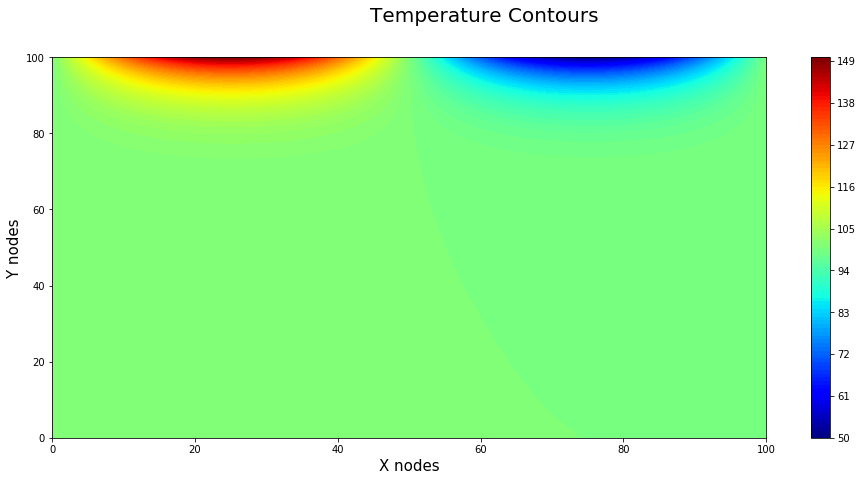

In [6]:
# Configure the contour
plt.figure(figsize=[16, 7])
plt.suptitle("Temperature Contours", fontsize=20)
plt.contourf(X, Y, T, levels=colorinterpolation, cmap=colourMap)
plt.xlabel("X nodes", fontsize=15)
plt.ylabel("Y nodes", fontsize=15)
plt.savefig("Q1.svg")
# Set Colorbar
plt.colorbar()